<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/24_3_%EC%9D%B4%EC%83%81%EC%B9%98_%ED%83%90%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ECG 데이터 이상탐지를 해봅시다

http://www.timeseriesclassification.com/description.php?Dataset=ECG5000

https://www.tensorflow.org/tutorials/generative/autoencoder

In [1]:
import pandas as pd

df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = df.values

In [2]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
5,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0
6,-0.297161,-2.766635,-4.102185,-4.589669,-4.219357,-3.650443,-2.300518,-1.293917,-1.065658,-0.490520,...,0.581779,0.684406,0.911651,0.979483,1.053458,0.974787,1.110407,1.288165,-0.823386,1.0
7,0.446769,-1.507397,-3.187468,-4.507462,-4.604201,-3.636115,-2.311604,-1.597727,-1.362450,-0.669216,...,1.001306,1.292059,1.378667,1.014765,0.820793,1.034388,1.258433,0.961215,-0.999476,1.0
8,0.087631,-1.753490,-3.304473,-4.704657,-4.686415,-3.611817,-2.267268,-1.570893,-1.417790,-0.500788,...,1.709046,2.142926,2.393528,1.925550,1.027624,0.573453,0.192971,-0.648683,-2.441068,1.0
9,-0.832281,-1.700368,-2.257301,-2.853671,-2.853301,-2.701487,-2.285726,-1.555512,-1.266622,-1.085957,...,2.110504,2.203668,2.227544,2.171733,2.045938,2.126372,2.126852,1.679299,0.965814,1.0


In [3]:
df[140].value_counts()

1.0    2919
0.0    2079
Name: 140, dtype: int64

Text(0.5, 1.0, '0.0')

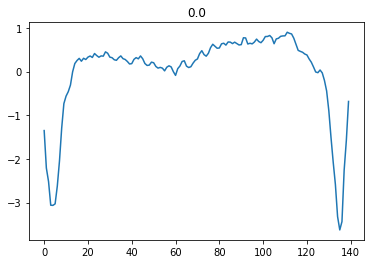

In [4]:
import matplotlib.pyplot as plt

row = -1
df.iloc[row,:-1].plot()
plt.title(df.iloc[row,-1])

In [5]:
# 마지막 열이 라벨임, 분리하여 dataset 만듦

from sklearn.model_selection import train_test_split

labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [6]:
train_data.shape

(3998, 140)

In [7]:
train_labels

array([1., 1., 1., ..., 1., 1., 1.])

In [8]:
type(train_data)

numpy.ndarray

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

model = models.Sequential([encoder, decoder])

In [10]:
model.compile(optimizer='adam', loss='mae')

In [11]:
# [0,1]로 데이터 정규화
min_val = train_data.min()
max_val = train_data.max()

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)


In [12]:
train_data

array([[0.57030466, 0.46561659, 0.29058117, ..., 0.48504233, 0.42335019,
        0.47598344],
       [0.48320587, 0.28246963, 0.16471254, ..., 0.56756701, 0.46772939,
        0.26923291],
       [0.48144641, 0.35151403, 0.25972766, ..., 0.54794209, 0.50775438,
        0.54298664],
       ...,
       [0.41039048, 0.24164985, 0.13120877, ..., 0.52773129, 0.56540911,
        0.50238847],
       [0.53977477, 0.41407858, 0.28101392, ..., 0.51266516, 0.43706054,
        0.44268649],
       [0.29639772, 0.15988175, 0.18883787, ..., 0.53766964, 0.54578602,
        0.40826709]])

In [13]:
# 정상:1, 비정상:0 데이터 분류
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [14]:
history = model.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/5 [=====>........................] - ETA: 0s - loss: 0.0589WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D3565F69D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

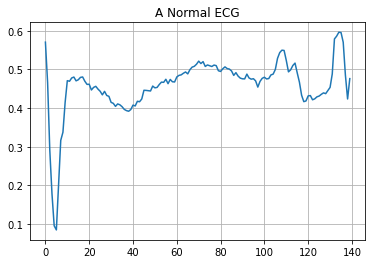

In [15]:
# 정상데이터 출력
import numpy as np

plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

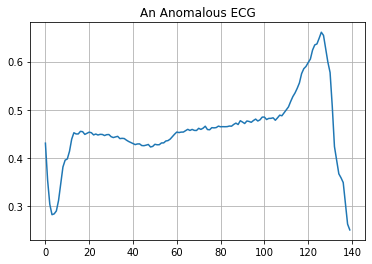

In [16]:
# 비정상 데이터 출력
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


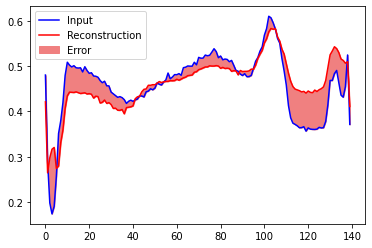

In [17]:
# 정상데이터로 훈련된 autoencoder에서 예측값과 입력 데이터를 비교

decoded_imgs = model.predict(normal_test_data)

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

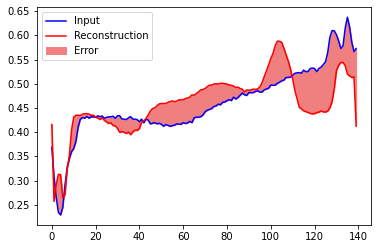

In [18]:
# 정상데이터로 훈련된 autoencoder에서 예측값과 입력 데이터를 비교

# 비정상 데이터를 입력으로 넣어보자
decoded_imgs = model.predict(anomalous_test_data)

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [19]:
# 정상데이터의 오차범위 확인
reconstructions = model.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

(array([[0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 array([0.00908066, 0.01811813, 0.0271556 , 0.03619307, 0.04523054,
        0.05426801, 0.06330548, 0.07234295, 0.08138042, 0.09041789,
        0.09945536]),
 <a list of 2359 BarContainer objects>)

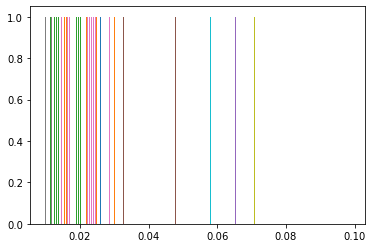

In [20]:
plt.hist(train_loss)

In [21]:
# 비정상 데이터 오차범위 확인
reconstructions2 = model.predict(anomalous_train_data)
train_loss2 = tf.keras.losses.mae(reconstructions2, anomalous_train_data)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.02172459, 0.02906414, 0.03640369, 0.04374325, 0.0510828 ,
        0.05842236, 0.06576191, 0.07310146, 0.08044102, 0.08778057,
        0.09512013]),
 <a list of 1639 BarContainer objects>)

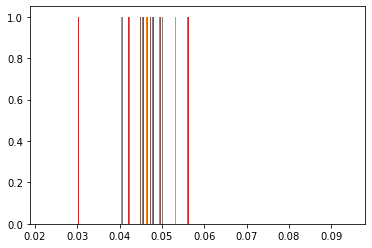

In [22]:
plt.hist(train_loss2)

In [23]:
# 정상데이터의 1표준편차 이상을 이상치로 판별해보자, 
threshold = np.mean(train_loss) + np.std(train_loss)

In [24]:
# 비정상 test data 
reconstructions3 = model.predict(anomalous_test_data)
test_loss3 = tf.keras.losses.mae(reconstructions3, anomalous_test_data)

In [25]:
test_loss3< threshold

<tf.Tensor: shape=(440,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, Fal

In [26]:
# test data 
reconstructions4 = model.predict(test_data)
test_loss4 = tf.keras.losses.mae(reconstructions4, test_data)

In [27]:
preds=test_loss4< threshold

In [28]:
test_labels

array([ True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
        True, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
       False,  True,

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(test_labels, preds))
print(precision_score(test_labels, preds))
print(recall_score(test_labels, preds))

0.944
0.9921875
0.9071428571428571


AutoEncoder는 차원 축소에도 사용할 수 있습니다

https://towardsdatascience.com/autoencoders-vs-pca-when-to-use-which-73de063f5d7